In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 

In [46]:
gold = pd.read_csv('gld_price_data.csv')

In [7]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold.shape


(2290, 6)

In [25]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [31]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
numeric_data = gold.select_dtypes(include=['float64', 'int64'])

In [32]:
correlation = numeric_data.corr()

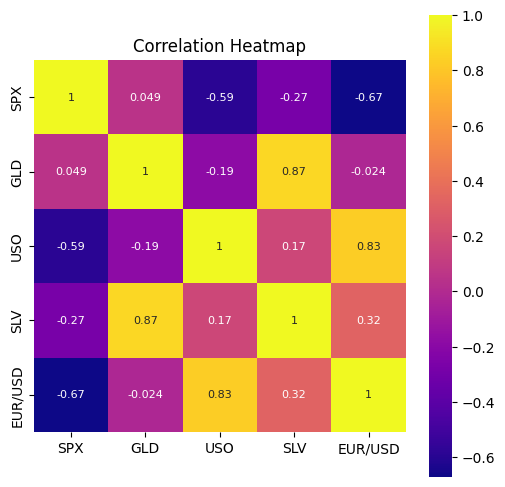

In [33]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size": 8}, cmap="plasma")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


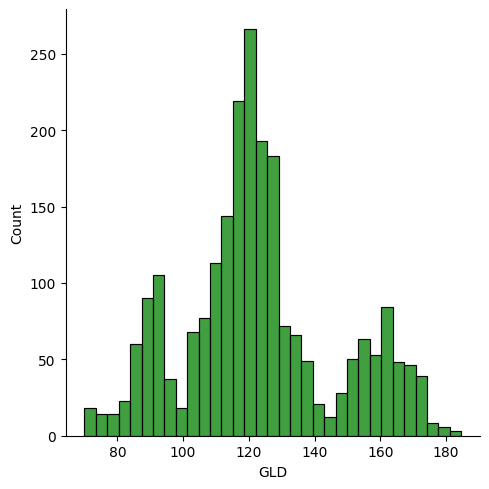

In [36]:
sns.displot(gold['GLD'],color='green')

In [37]:
# Split the features and target
X = gold.drop(['Date' , 'GLD'],axis=1)
y = gold['GLD']


In [38]:
X.shape


(2290, 4)

In [39]:
y.shape

(2290,)

In [41]:
#training the model 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1832, 4)
Shape of X_test: (458, 4)
Shape of y_train: (1832,)
Shape of y_test: (458,)


In [43]:
# Preview the first 5 rows of the training features
print("X_train sample:")
print(X_train.head())

# Preview the first 5 rows of the training target
print("y_train sample:")
print(y_train.head())


X_train sample:
              SPX         USO        SLV   EUR/USD
1018  1413.489990   36.220001  28.920000  1.253447
1870  2085.449951   11.740000  16.420000  1.132824
118   1245.359985  109.250000  18.545000  1.585590
220    805.219971   28.660000  11.090000  1.288494
2053  2328.949951   11.130000  17.530001  1.061639
y_train sample:
1018    160.539993
1870    120.900002
118      94.440002
220      84.519997
2053    122.599998
Name: GLD, dtype: float64


In [47]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
r2_score(y_test,pred)

0.9900152728775834

In [48]:
print(pred)

[122.52889942 131.01770277 127.61449923  96.77229766 118.82690041
 114.54029947 124.83870123 117.83279917 108.02150084  98.2410995
  95.46099927 167.4115984  148.19880191 116.60870018 171.0699019
  85.1263996  123.11549901 109.40549712 113.17350068 131.81280267
 124.2672992  113.71030059 116.25140032 108.62619955 108.28870137
 125.88139919 119.96719929 112.29279936 113.48890158 125.5565984
 146.29900148  89.5611001  167.86589982 113.4942996  108.47420124
 120.07410143 141.6841982  161.28970087 174.09899807 153.2291015
 119.05000123 113.57450071 121.35979951 113.61489913 121.84740001
 107.83220063  88.52919871 114.55709918 129.76660239 117.96690104
 104.05440026 129.74870259 107.45759864 160.76030328 131.67880058
 117.98239968 147.10239983 135.70960233  95.499901   124.64150162
 115.23859827  86.32070095 104.28439909 114.02830081  84.32729937
 122.17850042 116.51959885 113.69170195 166.04930281  92.32250021
  80.41110081 160.90780093 158.57940213 106.63610012 148.64020109
 109.81299754 